In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import regex 
import re, nltk
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS



In [78]:
import seaborn as sns

In [83]:
df3 = pd.read_csv('olist_order_reviews_dataset.csv')
df3.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
df = df.drop(['review_comment_title'],axis=1)


In [15]:
df = df.dropna()
df.reset_index(drop=True)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...
41748,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
41749,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
41750,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
41751,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [16]:
df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


In [21]:
messages = []
stop_words = set(stopwords.words('portuguese'))


for words in df['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] #lemmatizes the words i.e convert similar words to their
    # base form while still considering the context in which the words are used 
    
    messages.append(' '.join(lemmas))

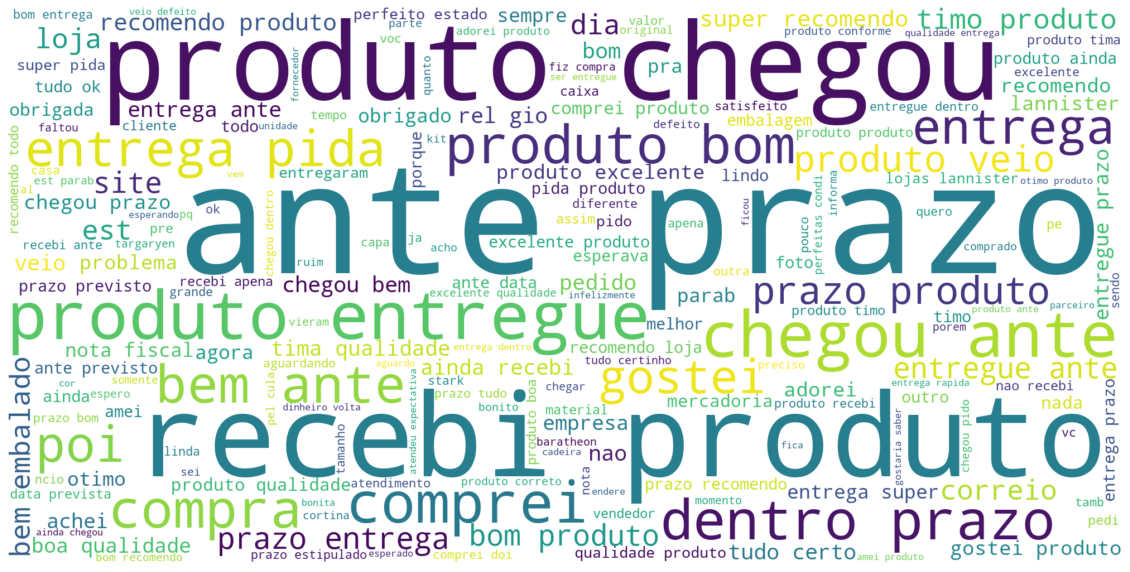

In [22]:
#Let's use worldcloud to visualize the messages
unique_string=(" ").join(messages)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(messages)
important_words = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [48]:
important_words=important_words.reset_index()


In [49]:
important_words.head()

,index,0
0,produto,18866
1,prazo,8543
2,entrega,6683
3,ante,5671
4,chegou,5643


In [50]:
important_words['index'].head()

0    produto
1      prazo
2    entrega
3       ante
4     chegou
Name: index, dtype: object

In [26]:
from translate import Translator
translator= Translator(from_lang="portuguese",to_lang="english")


In [27]:
ex = (translator.translate)('produto,prazo,entrega,ante,chegou,recebi,bom,recomendo,entregue,veio,') #translator.translate("Mas um pouco ,travando pelo valor ta Boa.\r\n")
print (ex)

product


In [53]:
important_words['New'] = important_words['index'].apply(translator.translate)

In [55]:
important_words

,index,0,New
0,produto,18866,product
1,prazo,8543,term
2,entrega,6683,delivery
3,ante,5671,PREV
4,chegou,5643,DID IT ARRIVE
5,recebi,5464,Inbox
6,bom,4637,good
7,recomendo,4362,do they recommend ?
8,entregue,3899,delivered.
9,veio,3362,shaft


In [56]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(messages)
important_biagrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [61]:
important_biagrams=important_biagrams.reset_index()

In [62]:
important_biagrams['index'].head()

0          ante prazo
1      recebi produto
2      produto chegou
3    produto entregue
4         chegou ante
Name: index, dtype: object

In [63]:
important_biagrams['New'] = important_biagrams['index'].apply(translator.translate)

In [64]:
important_biagrams

,index,0,New
0,ante prazo,4218,before term
1,recebi produto,1942,i received product
2,produto chegou,1720,product arrived
3,produto entregue,1616,delivered product
4,chegou ante,1467,arrived before
5,dentro prazo,1092,Time Frame
6,bem ante,973,well ante
7,entrega pida,900,pida delivery
8,produto bom,883,Good product.
9,produto veio,775,product came


In [65]:
from googletrans import Translator
translator = Translator()

In [68]:
result = translator.translate("nao recebi",src ='pt', dest ='en')
print(result.text)

not received


In [70]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(messages)
important_triagrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [71]:
important_triagrams=important_triagrams.reset_index()

In [73]:

important_triagrams['New'] = important_triagrams['index'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))



In [74]:
important_triagrams

,index,0,New
0,chegou ante prazo,1112,chegou before prazo
1,bem ante prazo,708,bem before prazo
2,entregue ante prazo,611,deliver before prazo
3,produto chegou ante,448,chegou product before
4,entrega ante prazo,435,delivery before prazo
5,chegou bem ante,417,chegou bem ante
6,produto entregue ante,376,product delivered before
7,entrega super pida,297,super delivery ask
8,ante prazo previsto,287,before expected term
9,ainda recebi produto,261,ainda received product


In [75]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer()
model = vectorizer.fit(df.review_comment_message)
docs = vectorizer.transform(df.review_comment_message)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([(feature_names[i])
    for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()
print_top_words(lda,vectorizer.get_feature_names(),10)

KeyboardInterrupt: 

In [ ]:
df['topic']=lda.transform(docs).argmax(axis=1)
df.topic.value_counts(normalize=True).plot.bar()

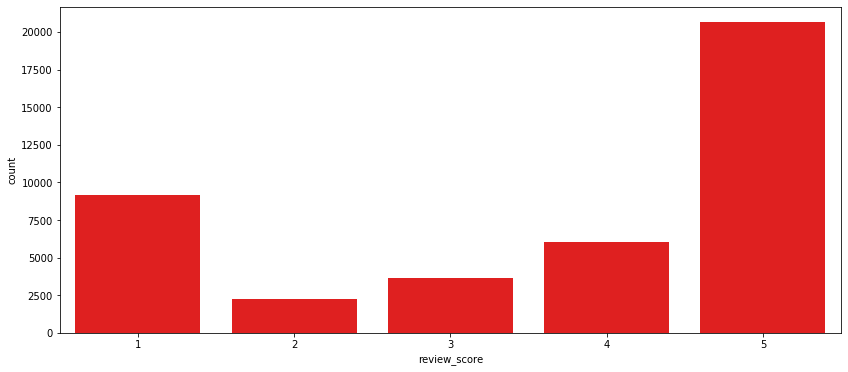

In [82]:
plt.figure(figsize = (14,6))
sns.countplot(df['review_score'], color= 'red')

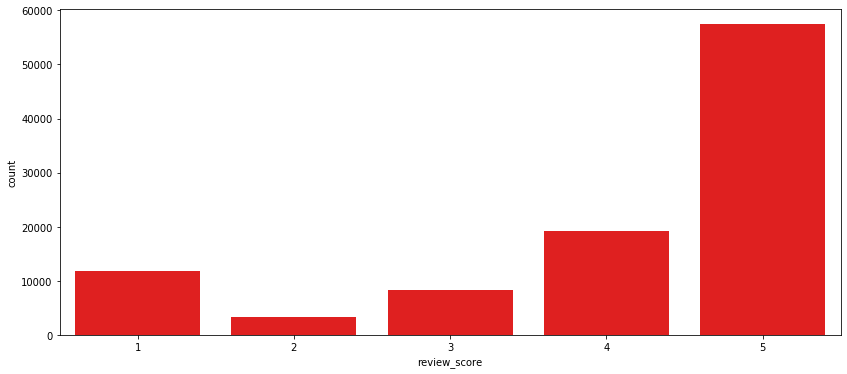

In [84]:
plt.figure(figsize = (14,6))
sns.countplot(df3['review_score'], color= 'red')